In [1]:
import pathlib
if not pathlib.Path("mpl_utils.py").exists():
  !curl -O https://raw.githubusercontent.com/joaochenriques/MCTE_2022/main/libs/mpl_utils.py

In [2]:
import matplotlib.pyplot as mpl
import numpy as np
import mpl_utils as mut
mut.config_plot()

%config InlineBackend.figure_formats = ['svg']

Velocity field

In [3]:
def velocity( t, y, x, A, k, ω, λ, h ):
    g  = 9.81
    aa = A * g * k / ω
    ux = aa * np.cosh( k*(y+h) ) / np.cosh( k*h ) * np.cos( k*x - ω*t )
    uy = aa * np.sinh( k*(y+h) ) / np.cosh( k*h ) * np.sin( k*x - ω*t )
    
    return ( ux, uy ) 

Wave height for a standing wave

In [4]:
def ζ( t, x, A, k, ω ):
    return 2.0 * A * np.cos( k*x ) * np.cos( ω*t )

Configure the test case

In [5]:
π = np.pi
g = 9.81

A = 0.05
h = 0.50
L = 20.0

λ = 2*L
k = 2 * π / λ
ω = np.sqrt( g * k * np.tanh(k*h) )
T = 2 * π / ω

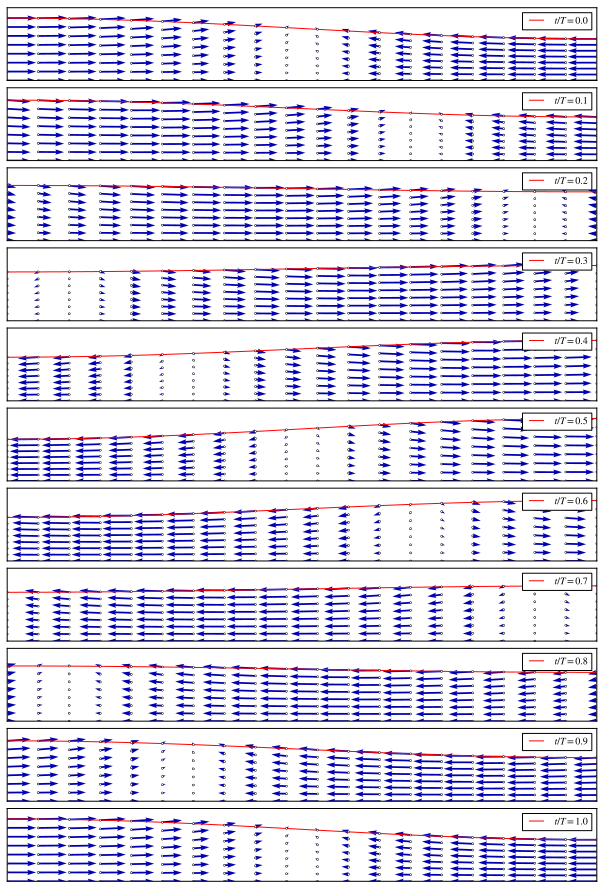

In [6]:
mpl.rcParams["figure.figsize"] = (10,15)

t_space = np.linspace( 0, T, 11 )
x_space = np.linspace( 0, L, 20 )

fig, axs =mpl.subplots( 11, 1 )
fig.subplots_adjust(hspace=0.1)

s_space = np.linspace( 0.0, 1.0, 8 )

for i, t in enumerate( t_space ):
    axs[i].plot( x_space, ζ( t, x_space, A, k, ω ), 'r-', label = '$t/T=%.1f$'%(t/T) )

    for s in s_space:
        y = ζ( t, x_space, A, k, ω )    
        ys_space = y*s - h*(1-s)
        axs[i].plot( x_space, ys_space, 'ro', markersize=2, markerfacecolor='w' )
        ux, uy = velocity( t, ys_space, x_space, A, k, ω, λ, h )

        axs[i].quiver( x_space, ys_space, ux, uy, color='#0000B0', width=0.003, scale=4.5, zorder=-2)

    axs[i].set_ylim( (-h,4*A) )
    axs[i].xaxis.set_visible(False)
    axs[i].yaxis.set_visible(False)
    axs[i].legend(fontsize=10)

fig.savefig( 'StandingWave.pdf', bbox_inches='tight' )